### Machine Learning desarrollo práctica final de módulo

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# https://ipython.readthedocs.io/en/stable/interactive/plotting.html
%matplotlib inline 

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

In [2]:
# definimos una función para representar el resultado del ajuste
def plot_decision_boundary(X,y,h,model):
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .05  # step size in the mesh
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Zd = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Zd = Zd.reshape(xx.shape)
    
    Zp = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1] 
    Zp = Zp.reshape(xx.shape)
    
    # Error de clasificación
    ypred = model.predict(X)
    acc = accuracy_score(y,ypred)
    
    plt.figure(1, figsize=(12, 5))
    
    plt.subplot(1,2,1)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
    plt.axis([x_min, x_max, y_min, y_max])
    plt.contour(xx, yy, Zd, levels=[0], linewidths=2)
    plt.contourf(xx, yy, Zd,cmap=cm, alpha=.5)
    plt.xlabel("$x_1$", fontsize=16)
    plt.ylabel("$x_2$", fontsize=16)
    msg = 'FRONTERA DECISION\n Acc: %0.2g' % acc
    plt.title(msg)
    
    plt.subplot(1,2,2)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
    plt.axis([x_min, x_max, y_min, y_max])
    #plt.contour(xx, yy, Zp, levels=[0], linewidths=2)
    plt.contourf(xx, yy, Zp,cmap=cm, alpha=.5)
    plt.xlabel("$x_1$", fontsize=16)
    plt.ylabel("$x_2$", fontsize=16)
    msg = 'PROBABILIDAD\n Acc: %0.2g' % acc
    plt.title(msg)
    
    plt.tight_layout()
    plt.show()

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 

# ejecute esta celda
def miRegresionLineal(x_i,y_i,x,y,degree):
    poly = PolynomialFeatures(degree)
    X_i  = poly.fit_transform(x_i.reshape(-1, 1))
    X_test = poly.fit_transform(x.reshape(-1, 1))
    lr     = LinearRegression().fit(X_i,y_i)
    
    y_hat = lr.predict(X_i)
    fw = lr.predict(X_test)
    
    error_train = np.mean(np.power(y_i-y_hat,2)) 
    error_test  = np.mean(np.power(y-fw,2)) 
    
   # print(lr.coef_)
    
    return fw, error_test, error_train

In [4]:
# Empezamos con la incorporación de los datos del fichero csv de Airbnb para generar nuestro dataset
# Y visualizamos los primeros elementos de forma transversal

airbnb_Data = pd.read_csv("./Data/airbnb-listings.csv", sep=";", decimal=".")
#airbnb_Data.head(5).T

In [5]:
#Calculamos el número de muestras y la dimensionalidad inicial.
#airbnb_Data.describe()
#airbnb_Data.isnull
#airbnb_Data.shape
N, d = airbnb_Data.shape
print(f'Numero de muestras actual es de {N} y la dimensionalidad es de {d}')

Numero de muestras actual es de 14780 y la dimensionalidad es de 89


In [505]:
# Procedemos a eliminar rows que creemos no son necesarias y que no nos afectarán a la porción que separemos de test.

airbnb_Data.drop(['ID','Listing Url', 'Scrape ID', 'Last Scraped','Name','Summary','Space','Description','Experiences Offered'
                  ,'Neighborhood Overview','Notes','Transit','Access','Interaction','House Rules',
                  'Thumbnail Url','Medium Url', 'Picture Url',
                'XL Picture Url', 'Host ID', 'Host URL','Host Name','Host About','Host Thumbnail Url'
                  ,'Host Picture Url','Host Neighbourhood','Host Verifications','Street','Neighbourhood','Features',
                 'Host Location','Neighbourhood Cleansed','License','Jurisdiction Names','Host Acceptance Rate'
                 ,'Amenities','Calendar last Scraped','Calendar Updated','Host Since','State','Market'
                ,'Smart Location','Has Availability','First Review','Last Review','Weekly Price','Monthly Price',
                 'Host Response Time'],
                 axis=1,inplace=True)

In [506]:
airbnb_Data.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Host Response Rate,100,NaN,100,100,100,100,99,NaN,99,100,100,99,99,100,90
Host Listings Count,2,1,1,2,21,1,207,1,207,1,27,207,207,162,1
Host Total Listings Count,2,1,1,2,21,1,207,1,207,1,27,207,207,162,1
Neighbourhood Group Cleansed,NaN,NaN,NaN,Sant Martí,Sarrià-Sant Gervasi,Gràcia,Gràcia,Sarrià-Sant Gervasi,Sants-Montjuïc,Sants-Montjuïc,Eixample,Eixample,Eixample,Eixample,Ciutat Vella
City,Amsterdam,Antwerpen,Austin,Barcelona,Barcelona,Barcelona,Barcelona,Barcelona,Barcelona,Barcelona,Barcelona,Barcelona,Barcelona,Barcelona,Barcelona
Zipcode,1074 VM,2018,78703,08018,08021,08012,08037,08022,08014,08028,08009,08009,08009,08008,08002
Country Code,NL,BE,US,ES,ES,ES,ES,ES,ES,ES,ES,ES,ES,ES,ES
Country,Netherlands,Belgium,United States,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain
Latitude,52.3527,51.2048,30.2871,41.3947,41.3963,41.4016,41.4035,41.4092,41.3762,41.3728,41.3972,41.391,41.3916,41.3945,41.3814
Longitude,4.90482,4.40373,-97.7682,2.18754,2.14285,2.16253,2.1666,2.13628,2.14498,2.12773,2.16923,2.16859,2.16817,2.16154,2.18087


In [507]:
#Lo dejamos para más adelante para determinar si tenemos outliers
#airbnb_Data.describe()


In [508]:
#Verificamos el nombre de de cada columna(dimensión)
feature_names = airbnb_Data.columns[1:]

In [509]:
feature_names

Index(['Host Listings Count', 'Host Total Listings Count',
       'Neighbourhood Group Cleansed', 'City', 'Zipcode', 'Country Code',
       'Country', 'Latitude', 'Longitude', 'Property Type', 'Room Type',
       'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type',
       'Square Feet', 'Price', 'Security Deposit', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
       'Availability 30', 'Availability 60', 'Availability 90',
       'Availability 365', 'Number of Reviews', 'Review Scores Rating',
       'Review Scores Accuracy', 'Review Scores Cleanliness',
       'Review Scores Checkin', 'Review Scores Communication',
       'Review Scores Location', 'Review Scores Value', 'Cancellation Policy',
       'Calculated host listings count', 'Reviews per Month', 'Geolocation'],
      dtype='object')

In [510]:
# En esta celda, filtraremos las poblaciones que contengan Madrid
# El csv descargado debía contener únicamente datos pertenecientes a Madrid

#Borramos todos los valores nulo en City
airbnb_Data.dropna(subset=['City'],inplace=True)

#Cargamos el Dataset con las poblaciones que contengan Madrid no teniendo en cuenta mayúsculas y minúsculas.
airbnb_Data = airbnb_Data[airbnb_Data["City"].str.contains('Madrid', na=False, case=False) ]

#Mostramos un conteo de todos los resultados agrupados por City
airbnb_Data["City"].value_counts()



Madrid                                 13207
Madrid, Comunidad de Madrid, ES           20
madrid                                     8
MADRID                                     2
Aravaca (Madrid)                           1
Chueca, Madrid                             1
Centro, Madrid                             1
Delicias-Madrid                            1
Comunidad de Madrid                        1
las matas  madrid                          1
Madrid, Vallecas (Fontarrón)               1
Madrid, Comunidad de Madrid, ESPANA        1
Name: City, dtype: int64

In [511]:
print('Datos airbnb antes del borrado de NaN en Price: ', airbnb_Data.shape)

Datos airbnb antes del borrado de NaN en Price:  (13245, 41)


In [512]:
#Nuestro target es el precio, por lo tanto no podemos admitir registros sin precio
airbnb_Data.dropna(subset=['Price'],inplace=True)


In [513]:
print('Datos airbnb después del borrado de NaN en Price: ', airbnb_Data.shape)

Datos airbnb después del borrado de NaN en Price:  (13236, 41)


In [514]:
#Transformamos los Feets a Metros en la superficie de los pisos, pero antes deberemos tratar los nulos
airbnb_Data['Square Feet'].fillna(0.0, inplace = True)

#airbnb_Data[['Square Feet']] = airbnb_Data[['Square Feet']].apply(lambda x: x * 0.3048 * 0.3048)

In [515]:
# Dejamos esta celda vacía para saber dónde incluir más filtros, si fueran necesarios, antes del Split.
#Surgen dudas a la hora de categorizar y limpiar. Hacemos el Split antes o después.

#airbnb_Data[airbnb_Data['Square Feet'] > 0]

In [516]:
#Categorizamos las variables que intuitivamente creemos pueden tener influencia en el resultado final
#En el dataset de Training

# opción con LabelEncoder
from sklearn import preprocessing
le0 = preprocessing.LabelEncoder()
le1 = preprocessing.LabelEncoder()
le2 = preprocessing.LabelEncoder()
le3 = preprocessing.LabelEncoder()
le4 = preprocessing.LabelEncoder()
le5 = preprocessing.LabelEncoder()
le6 = preprocessing.LabelEncoder()

airbnb_Data['Property Type'].fillna('nan', inplace = True)
le0.fit(airbnb_Data['Property Type'])
airbnb_Data['Property Type'] = le0.transform(airbnb_Data['Property Type'])

airbnb_Data['Bed Type'].fillna('nan', inplace = True)
le1.fit(airbnb_Data['Bed Type'])
airbnb_Data['Bed Type'] = le1.transform(airbnb_Data['Bed Type'])

airbnb_Data['Room Type'].fillna('nan', inplace = True)
le2.fit(airbnb_Data['Room Type'])
airbnb_Data['Room Type'] = le2.transform(airbnb_Data['Room Type'])

airbnb_Data['Bed Type'].fillna('nan', inplace = True)
le3.fit(airbnb_Data['Bed Type'])
airbnb_Data['Bed Type'] = le3.transform(airbnb_Data['Bed Type'])

airbnb_Data['Cancellation Policy'].fillna('nan', inplace = True)
le4.fit(airbnb_Data['Cancellation Policy'])
airbnb_Data['Cancellation Policy'] = le4.transform(airbnb_Data['Cancellation Policy'])

airbnb_Data['Neighbourhood Group Cleansed'].fillna('nan', inplace = True)
le6.fit(airbnb_Data['Neighbourhood Group Cleansed'])
airbnb_Data['Neighbourhood Group Cleansed'] = le6.transform(airbnb_Data['Neighbourhood Group Cleansed'])

print(list(le0.classes_))
print(list(le1.classes_))
print(list(le2.classes_))
print(list(le3.classes_))
print(list(le4.classes_))
print(list(le6.classes_))

['Apartment', 'Bed & Breakfast', 'Boat', 'Boutique hotel', 'Bungalow', 'Camper/RV', 'Casa particular', 'Chalet', 'Condominium', 'Dorm', 'Earth House', 'Guest suite', 'Guesthouse', 'Hostel', 'House', 'Loft', 'Other', 'Serviced apartment', 'Tent', 'Timeshare', 'Townhouse', 'Villa']
['Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed']
['Entire home/apt', 'Private room', 'Shared room']
[0, 1, 2, 3, 4]
['flexible', 'moderate', 'strict', 'super_strict_30', 'super_strict_60']
['Arganzuela', 'Barajas', 'Carabanchel', 'Centro', 'Chamartín', 'Chamberí', 'Ciudad Lineal', 'Fuencarral - El Pardo', 'Hortaleza', 'Latina', 'Moncloa - Aravaca', 'Moratalaz', 'Puente de Vallecas', 'Retiro', 'Salamanca', 'San Blas - Canillejas', 'Tetuán', 'Usera', 'Vicálvaro', 'Villa de Vallecas', 'Villaverde']


In [517]:
airbnb_Data.head(25).T

,43,44,45,46,47,48,49,50,51,52,...,58,59,60,61,62,63,64,65,66,67
Host Response Rate,84,100,100,100,100,100,100,100,90,100,...,100,100,100,100,100,NaN,67,100,89,100
Host Listings Count,3,1,2,8,2,13,45,1,1,13,...,28,2,1,1,1,1,1,4,4,1
Host Total Listings Count,3,1,2,8,2,13,45,1,1,13,...,28,2,1,1,1,1,1,4,4,1
Neighbourhood Group Cleansed,13,14,14,14,14,14,14,14,14,14,...,14,14,14,4,4,4,4,4,4,4
City,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,...,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid
Zipcode,28007,28001,28001,28001,28001,28006,28001,28001,28009,28001,...,28028,28028,28006,28002,28002,28002,28002,28002,28016,28016
Country Code,ES,ES,ES,ES,ES,ES,ES,ES,ES,ES,...,ES,ES,ES,ES,ES,ES,ES,ES,ES,ES
Country,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,...,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain
Latitude,40.407,40.4259,40.4284,40.4275,40.4287,40.4218,40.4256,40.4265,40.4248,40.4271,...,40.4238,40.4237,40.4343,40.4425,40.4447,40.4494,40.4479,40.4453,40.4569,40.4575
Longitude,-3.67089,-3.68165,-3.68715,-3.68576,-3.68542,-3.69107,-3.6837,-3.6761,-3.67293,-3.67884,...,-3.66509,-3.66603,-3.67261,-3.67356,-3.67336,-3.67735,-3.67012,-3.67542,-3.6797,-3.67359


In [518]:
#airbnb_Data[(airbnb_Data['Bathrooms'].isnull())]['Bathrooms']

In [525]:
#Creamos una matriz de correlación y posteriormente lo representamos graficamente.
airbnb_train.corr()

,Host Response Rate,Neighbourhood Group Cleansed,Latitude,Longitude,Property Type,Room Type,Bathrooms,Bedrooms,Beds,Bed Type,...,Minimum Nights,Maximum Nights,Number of Reviews,Review Scores Cleanliness,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month
Host Response Rate,1.000000,-0.039495,-0.035076,-0.025697,-0.005550,-0.079125,-0.038572,0.007702,0.032306,-0.013072,...,0.015814,0.001485,0.136886,0.110993,0.109361,0.061002,0.110025,0.077457,-0.066818,0.189959
Neighbourhood Group Cleansed,-0.039495,1.000000,0.146943,0.337219,0.076446,0.118133,0.007953,0.021171,-0.008983,0.001510,...,0.015920,-0.003610,-0.153147,-0.044126,-0.022185,-0.252503,-0.046095,-0.072937,-0.035937,-0.147909
Latitude,-0.035076,0.146943,1.000000,0.251261,0.038466,-0.008205,0.037394,0.028330,0.018566,0.009229,...,-0.006744,0.005236,-0.062178,-0.008897,0.006819,0.054055,-0.005707,-0.035384,0.011087,-0.061615
Longitude,-0.025697,0.337219,0.251261,1.000000,0.063663,0.070413,0.011101,0.012666,-0.018662,-0.001294,...,-0.001145,-0.004133,-0.047048,0.032858,0.016034,-0.106557,0.024202,-0.060723,-0.045028,-0.012378
Property Type,-0.005550,0.076446,0.038466,0.063663,1.000000,0.122069,0.034848,0.004329,-0.011313,0.013049,...,-0.001711,0.002257,-0.056158,-0.003264,-0.008341,-0.045905,-0.002879,-0.085482,-0.087644,-0.020501
Room Type,-0.079125,0.118133,-0.008205,0.070413,0.122069,1.000000,0.030254,-0.238274,-0.265858,0.003429,...,-0.030129,-0.009719,-0.141876,-0.052381,-0.031003,-0.112369,0.002351,-0.212283,-0.095994,-0.101895
Bathrooms,-0.038572,0.007953,0.037394,0.011101,0.034848,0.030254,1.000000,0.428118,0.390009,0.041018,...,0.020859,-0.003772,-0.053731,0.005385,-0.042297,0.039945,-0.000341,0.110241,0.160019,-0.053073
Bedrooms,0.007702,0.021171,0.028330,0.012666,0.004329,-0.238274,0.428118,1.000000,0.684082,0.065086,...,0.012364,0.000806,-0.020765,0.002966,-0.001636,-0.000570,-0.000363,0.085866,0.063447,-0.038250
Beds,0.032306,-0.008983,0.018566,-0.018662,-0.011313,-0.265858,0.390009,0.684082,1.000000,0.053235,...,-0.001457,0.002045,0.042395,-0.021664,-0.035324,0.001994,-0.048644,0.151571,0.095065,-0.011288
Bed Type,-0.013072,0.001510,0.009229,-0.001294,0.013049,0.003429,0.041018,0.065086,0.053235,1.000000,...,0.005827,0.003246,-0.006224,-0.003261,-0.011326,-0.009654,-0.006348,-0.010294,0.007847,-0.010351


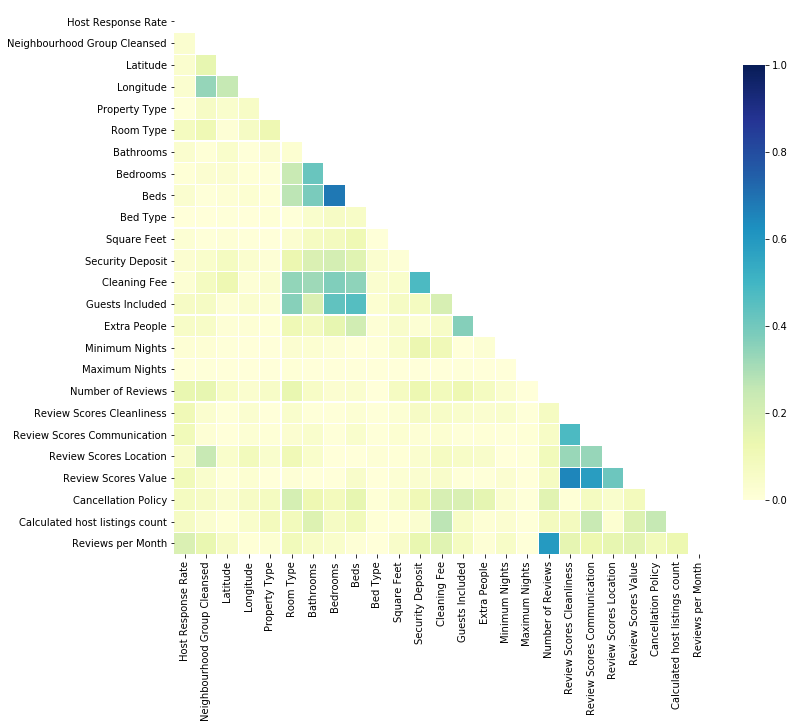

In [526]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(airbnb_Data.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [521]:
#Con esta matriz/gráfica anulamos variables que están fuertemente correladas

airbnb_Data.drop(['Host Listings Count','Host Total Listings Count','Accommodates','Availability 30'
                  , 'Availability 60', 'Availability 90','Availability 365','Review Scores Rating'
                  ,'Review Scores Accuracy','Review Scores Checkin','Host Listings Count'],
                 axis=1,inplace=True)

In [522]:
feature_names

Index(['Host Listings Count', 'Host Total Listings Count',
       'Neighbourhood Group Cleansed', 'City', 'Zipcode', 'Country Code',
       'Country', 'Latitude', 'Longitude', 'Property Type', 'Room Type',
       'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type',
       'Square Feet', 'Price', 'Security Deposit', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
       'Availability 30', 'Availability 60', 'Availability 90',
       'Availability 365', 'Number of Reviews', 'Review Scores Rating',
       'Review Scores Accuracy', 'Review Scores Cleanliness',
       'Review Scores Checkin', 'Review Scores Communication',
       'Review Scores Location', 'Review Scores Value', 'Cancellation Policy',
       'Calculated host listings count', 'Reviews per Month', 'Geolocation'],
      dtype='object')